<a href="https://colab.research.google.com/github/sophie210286/20308-DSCI-4850-AssignmentTwo-/blob/main/Bell_Sophia_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assisgment 2 - (350/400 points)

**Total points (350 undergraduate / 400 graduate)**

**Student Name: Sophia Bell**

**Graduate / Undergraduate: Undergraduate**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 for your randomseed/random state. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment2.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 50 extra credit points by doing two simple things (you need to do BOTH):

1) Make nice and pretty plots (only using the provided packages!)

2) Make your GitHub repo professional (this includes your own landing page as well). Examples: https://github.com/abhisheknaiidu/awesome-github-profile-readme


Remember that you will need a portfolio for your job search, and a professional looking repo will certainly impress recruiters/interviewers. So this is more of a favor to yourself! (yes, I follow this myself: https://github.com/jmbanda)


In [2]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Using the Wine dataset from sklearn:

In [3]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()

# Question 1 (10 points)

What can you say about the dataset (use code to descirbe it)? any particular things of interest? Find at least two things that you find interesting.

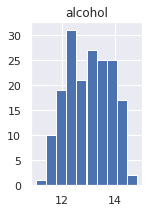

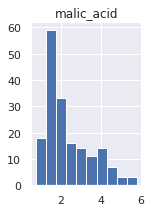

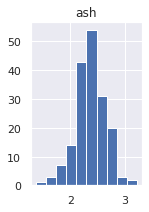

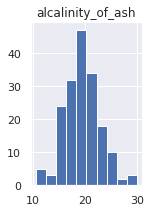

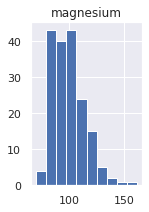

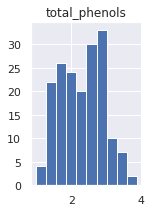

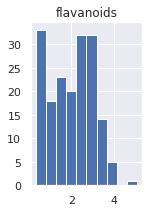

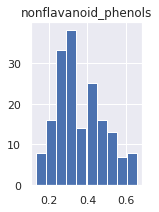

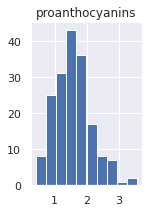

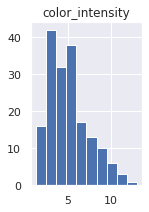

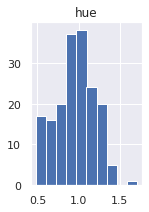

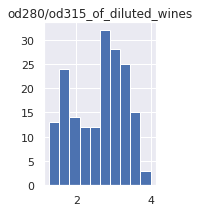

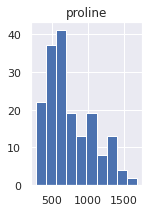

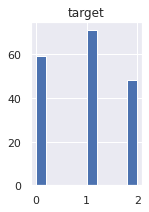

In [202]:
##### Code block for Question 1
df_wine = pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])  # creating data frame w/ target


df_wine.describe() # getting a description of dataset


# looking at distribution of each column
for x in df_wine.columns:
  df_wine.hist(column = x,figsize=(2,3))


Textual answer to question 1 goes here.

1.   A little less than 1/2 of the data has a target value of 1. 
2.   Just looking at the first three columns. The alcohol variable has a somewhat centered distribution, the malic_acid variable is skewed to the right, the ash variable appears to look normal



# Question 2 (10 points)

Remove class_2, so it becomes a binary problem now. Split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [13]:
##### Code block for Question 2
from sklearn.model_selection import train_test_split      # for splitting into train / test



# removing class_2

df_wine   # checking original dataset
dfb = df_wine.copy()   # making a copy that I will use for this question (dfb = binary dataframe)

dfb.drop(dfb[(dfb['target'] == 2)].index, inplace = True)

dfb   # there should be 130 rows left (target = 0 (59) and target = 1 (71) = 130)



# splitting the dataset into training = 65% : testing = 35% 

y = 'target'  # getting Y
X = dfb.loc[:, dfb.columns != Y].columns   # defining X

X_train, X_test, y_train, y_test = train_test_split(dfb[X], dfb[y],test_size=0.35, random_state=1234)

# Question 3 (30 points)

Use the perceptron algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [20]:
##### Code block for Question 3
from sklearn.linear_model import Perceptron

seed = '1234' 


m_perceptron = Perceptron(tol=1e-3, random_state=1234) 

m_perceptron.fit(X_train, y_train)   #train the perceptron model


# reporting model accuracy
m_perceptron.score(X_train, y_train)

0.75

# Question 4 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 4, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [23]:
##### Code block for Question 4
from sklearn.metrics import classification_report

predictions = m_perceptron.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.21      0.35        19
         1.0       0.64      1.00      0.78        27

    accuracy                           0.67        46
   macro avg       0.82      0.61      0.57        46
weighted avg       0.79      0.67      0.60        46





1.   The target = 1 has a higher support score, meaning it occurs more often than when the target = 0
2.   The F1 score for target = 0 is below .5, which means the model performance is not very good at predicting this target value, compared to the target = 1 which has a somewhat higher score.
3.   For target = 1: the high precision but lower recall indicates that most of its predictions are correct when compared to the training labels.



# Question 5 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

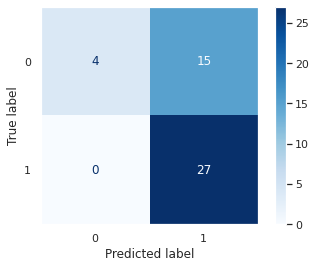

In [136]:
##### Code block for Question 5 - part 1

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display = cm_display.plot(cmap=plt.cm.Blues,values_format='g')
plt.grid(False)
plt.show()

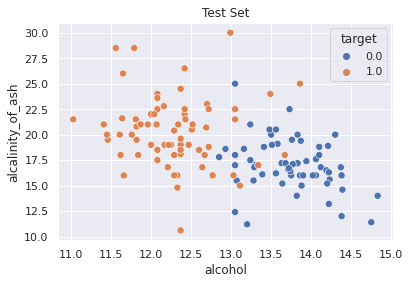

In [191]:
##### Code block for Question 5 - part 2

sns.scatterplot(data=dfb, x='alcohol', y='alcalinity_of_ash', hue='target',s = 50)
plt.title("Test Set")
plt.show()

# Question 6 (10 points) 

a) Do the plot right plot on Question 5 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Textual answer to question 6 a goes here.

Textual answer to question 6 b goes here.
1. For the model performance it seems to be a somewhat even split between variables with target value of 1 and a target value of 0 (ie. the data appears to be somewhat balanced)

# Question 7 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [104]:
##### Code block for Question 7

# reloading wine dataset --> THIS will include the target = 2
df_wine

# splitting
y2 = 'target'  # getting Y (which will include target = 2)
X2 = df_wine.loc[:, df_wine.columns != Y].columns   # defining X

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_wine[X2], df_wine[y2],test_size=0.35, random_state=1234)

# Question 8 (30 points)

Use the Decision Tree algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [105]:
##### Code block for Question 8
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1234) 
tree.fit(X_train2, y_train2)
tree.score(X_train2, y_train2)

1.0

# Question 9 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 9, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [106]:
##### Code block for Question 9
from sklearn.metrics import classification_report

predictions2 = tree.predict(X_test2)
print(classification_report(y_test2, predictions2))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        19
         1.0       0.92      0.92      0.92        26
         2.0       0.90      1.00      0.95        18

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



1. The high precision score means the accuracy of positive predictions was very good/high for all target variables
2. Target = 1 has the highest support score, meaning is occurs/was predicted the most often
3. All three target variables have a high F1-score which means the models performs/predicts very well for all labels

# Question 10 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

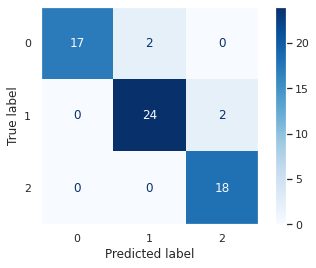

In [135]:
##### Code block for Question 10 - part 1
from sklearn import metrics
confusion_matrix2 = metrics.confusion_matrix(y_test2, predictions2)

cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [0, 1, 2])
cm_display2 = cm_display2.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

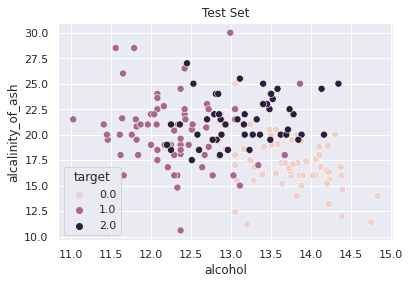

In [190]:
##### Code block for Question 10 - part 2

sns.scatterplot(data=df_wine, x='alcohol', y='alcalinity_of_ash', hue='target',s = 50)
plt.title("Test Set")
plt.show()

# Question 11 (30 points) 

a) Do the plot right plot on Question 10 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

c) Plot the figure from question 10 - part 2 using the `visualize_classifier` function given during the class example from 2/20/2023.

Textual answer to question 11 a goes here.

Textual answer to question 11 b goes here.
1. For the model performance it seems to be a somewhat even split between variables with target value of 1 and a target value of 0 (ie. the data appears to be somewhat balanced)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: ignored

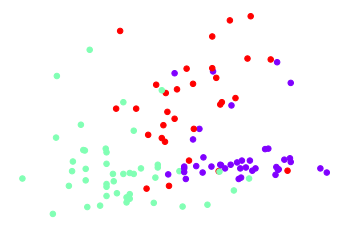

In [218]:
##### Code block for Question 11 - part c
def visualize_classifier(model, X_train2, y_train2, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X_train2.iloc[:, 0], X_train2.iloc[:, 1], c=y_train2, s=30, cmap=cmap,
               clim=(y_train2.min(), y_train2.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X_train2, y_train2)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y_train2))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
  
visualize_classifier(DecisionTreeClassifier(), X_train2, y_train2)

# Question 12 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [125]:
##### Code block for Question 12

# reloading wine dataset --> THIS will include the target = 2
df_wine

# splitting
y3 = 'target'  # getting Y (which will include target = 2)
X3 = df_wine.loc[:, df_wine.columns != Y].columns   # defining X

X_train3, X_test3, y_train3, y_test3 = train_test_split(df_wine[X3], df_wine[y3],test_size=0.35, random_state=1234)

# Question 13 (30 points)

Use the Logistic Regression (with as this is a multi-class problem, use the **One Vs Rest algorithm** we must use `liblinear` solver and the correct seed) to build a model on the training set and report the model's accuracy.

In [130]:
##### Code block for Question 13
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1234)
logreg.fit(X_train3, y_train3)
logreg.score(X_train3, y_train3)

# I don't know if it will show but on my colab it gave me a ConvergenceWarning, but I still kept the default settings b/c thats what the question asked
# printed score of: 0.9826086956521739

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9826086956521739

# Question 14 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 14, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [132]:
##### Code block for Question 14
from sklearn.metrics import classification_report

predictions3 = logreg.predict(X_test3)
print(classification_report(y_test3, predictions3))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        19
         1.0       0.96      0.92      0.94        26
         2.0       0.90      1.00      0.95        18

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.95      0.95      0.95        63



Textual answer to question 14 goes here.

1.   All three target variables have a high F1-score which means the models performs/predicts very well
2.   Target = 2 has the lowest support score, meaning is occurs/was predicted the least often
3.   The high precision score means the accuracy of positive predictions was very good/high for all target variables



# Question 15 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

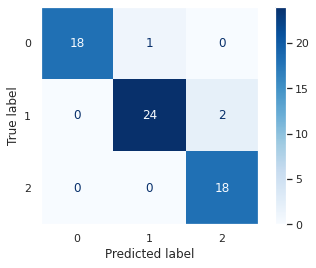

In [134]:
##### Code block for Question 15 - part 1
from sklearn import metrics
confusion_matrix3 = metrics.confusion_matrix(y_test3, predictions3)

cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [0, 1, 2])
cm_display3 = cm_display3.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

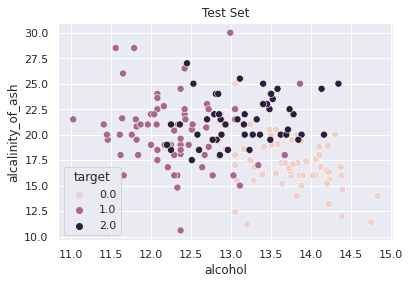

In [189]:
##### Code block for Question 15 - part 2
sns.scatterplot(data=df_wine, x='alcohol', y='alcalinity_of_ash', hue='target',s = 50)
plt.title("Test Set")
plt.show()

# Question 16 (20 points) 

a) Do the plot right plot on Question 15 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Textual answer to question 16 a goes here.

Textual answer to question 16 b goes here.

1. For the model performance it seems to be a somewhat even split between variables with target value of 1 and a target value of 0 (ie. the data appears to be somewhat balanced)

# Question 17 (10 points)

Create AND display dataframe containing in each row the accruacy, precision, recall for each of the models built. 

In the textual answer cell, discuss which one is the best performing model and why?

In [174]:
##### Code block for Question 17

# I did the the long way I know it was just easier for me :)
from sklearn.metrics import accuracy_score,precision_score,recall_score

# precision
tree_precision = precision_score(y_test, predictions, labels=[1,2], average = 'binary') # binary b/c I took out class 2
logreg_precision = precision_score(y_test3, predictions3, average = 'macro')
m_perceptron_precision = precision_score(y_test2, predictions2, average = 'macro')

#recall
tree_recall = recall_score(y_test, predictions, labels=[1,2], average = 'binary') # binary b/c I took out class 2
logreg_recall = recall_score(y_test3, predictions3, average = 'macro')
m_perceptron_recall = recall_score(y_test2, predictions2, average = 'macro')


# making dict of all data
data = {'Classifier': ['Logistic Regression', 'Decision Tree', 'Perceptron'],
        'accuracy': [logreg.score(X_train3, y_train3), tree.score(X_train2, y_train2), m_perceptron.score(X_train, y_train)],
        'precision': [logreg_precision,tree_precision,m_perceptron_precision],
        'recall':[logreg_recall,tree_recall,m_perceptron_recall] 
      }
  
# Create DataFrame
df = pd.DataFrame(data).set_index('Classifier')
df


,accuracy,precision,recall
Classifier,,,
Logistic Regression,0.721739,0.953333,0.956815
Decision Tree,1.000000,0.642857,1.000000
Perceptron,0.750000,0.941026,0.939271


The logistic regression model performed the best.

# Graduate Student Question: (50 points)

Modify the `visualize_classifier` function provided during the 2/20/2023 class to be able to work in 3 dimensions (currently only works in two dimensions). Take the Decision Tree classifier model from Question 8 and plot the separation of the classes using the following axes: (Alcohol as the X axis and Alcalinity of Ash as the Y axis, and Ash as the Z axis).


In [175]:
##### Code block for Graduate Student Question